### Organisation in the geographical space


Plot the communitites

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
from geopandas.tools import sjoin
#from geodatasets import get_path

In [2]:
### Librairie à installer dans l'environnement conda (si on exécute en local)
# qui sera choisi pour exécuter le carnet
from SPARQLWrapper import SPARQLWrapper, JSON, TURTLE, XML, RDFXML


import networkx as nx
from networkx.algorithms import bipartite

import matplotlib.pyplot as plt
import matplotlib.patches as patches


import plotly.express as px

import numpy as np
import seaborn as sns
import math
import os

In [7]:
### Librairies déjà installées avec Python
import pprint
import csv


from shutil import copyfile


In [10]:
### Importer un module de fonctions crées ad hoc
##  ATTENTION : le fichier 'sparql_functions.py' doit se trouver 
#   dans un dossier qui se situe dans le chemin ('path') de recherche
#   vu par le présent carnet Jupyter afin que
#   l'importation fonctionne correctement

import sys
from importlib import reload

# Add parent directory to the path
sys.path.insert(0, '..')

### If you want to add the parent-parent directory,
sys.path.insert(0, '../..')


import sparql_functions as spqf
import network_analysis_functions as naf

In [11]:
print(reload(naf))  

<module 'network_analysis_functions' from '/home/francesco/kDrive/python_notebooks/astronomers/notebooks_jupyter/wikidata_exploration/../network_analysis_functions.py'>


## Geo data

In [4]:
world_filepath = '../geo_data/esri/World_Regions_6144914380456424035.geojson'
world = gpd.read_file(world_filepath)
world.head()

,FID,REGION,SQMI,SQKM,geometry
0,1,Asiatic Russia,4.987737e+06,1.291823e+07,"MULTIPOLYGON (((-179.99999 68.98009, -179.9580..."
1,2,Australia/New Zealand,3.077219e+06,7.969992e+06,"MULTIPOLYGON (((158.88218 -54.71139, 158.87967..."
2,3,Caribbean,8.919361e+04,2.310113e+05,"MULTIPOLYGON (((-60.92305 10.79722, -60.94445 ..."
3,4,Central America,9.576923e+05,2.480422e+06,"MULTIPOLYGON (((-81.67847 7.38861, -81.64945 7..."
4,5,Central Asia,1.612212e+06,4.175626e+06,"POLYGON ((53.90564 37.35086, 53.67731 37.33536..."


In [5]:
### Inspect the projection
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

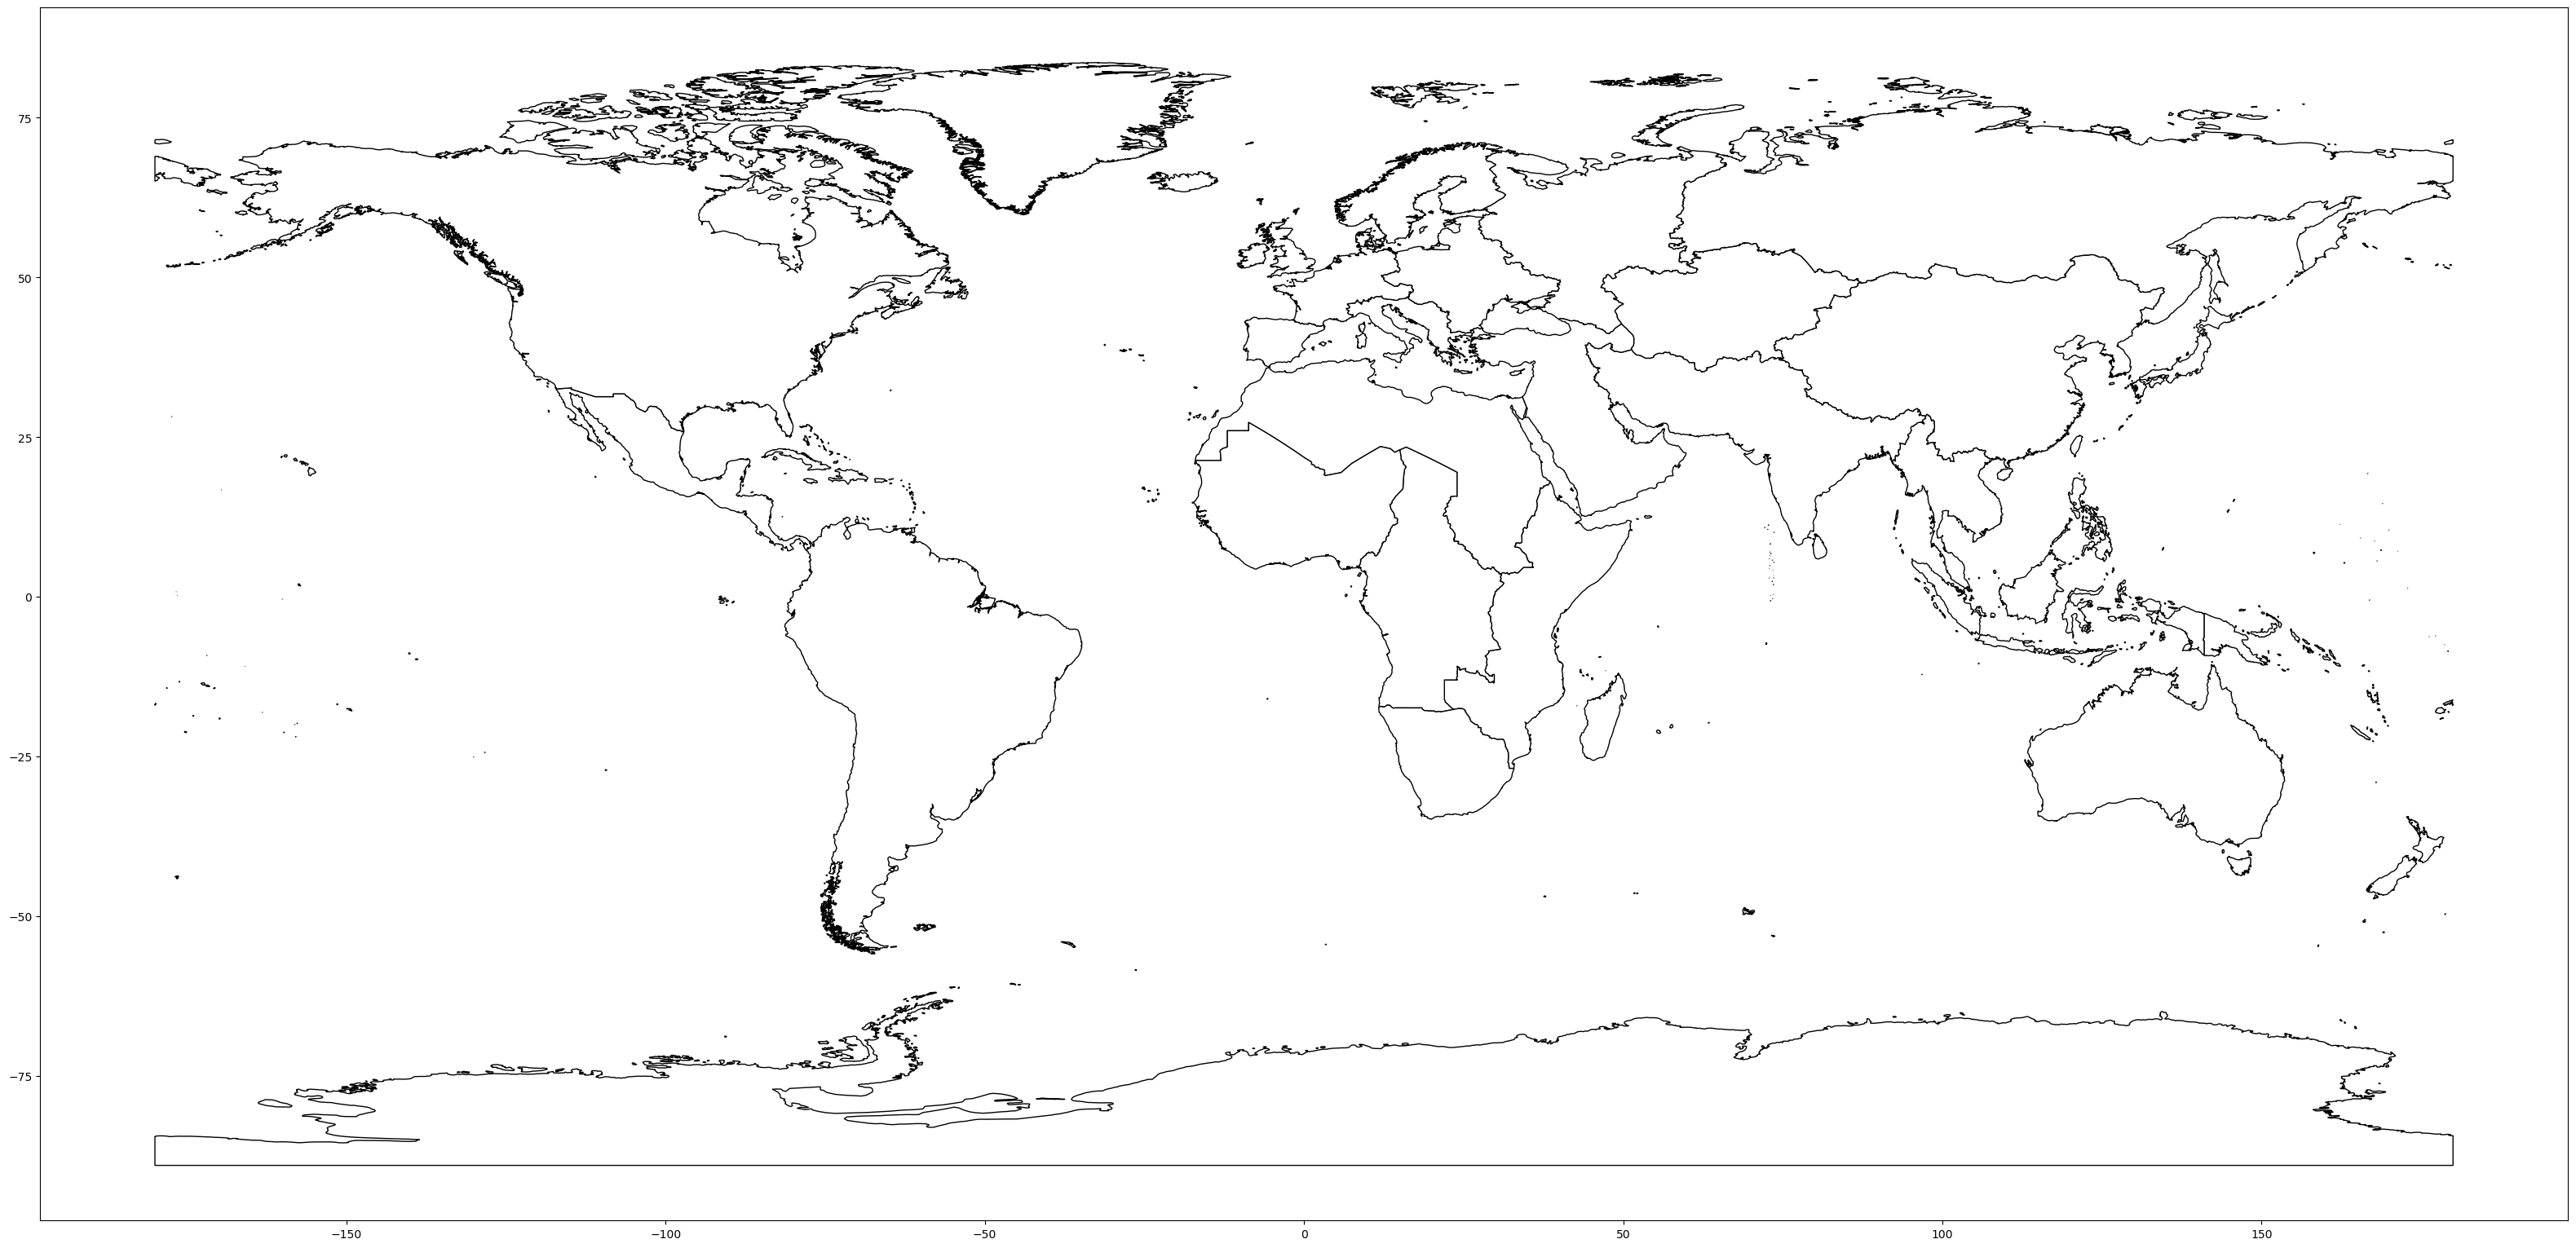

In [6]:
### Draw the world map

# If we want to restrict to South America.
# world.clip([-90, -55, -25, 15])

ax = world.plot(color="white", edgecolor="black", figsize=(40,30))


plt.show()



## Get the data from the triplestore

This notebook is based on the 

...  [compléter]


In [13]:
## define SPARQL enpoint
endpoint = "https://ag16gm9pr0meths2.allegrograph.cloud/repositories/astronomers"

In [20]:
query = """
### Nombre de personnes

PREFIX franzOption_defaultDatasetBehavior: <franz:rdf>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?organisation ?organisationLabel ?location
WHERE {
    GRAPH <https://github.com/Sciences-historiques-numeriques/astronomers/blob/main/graphs/wikidata-imported-data.md>
        {?organisation a crm:E74_Group;
            rdfs:label ?organisationLabel;
            wdt:P625 ?location.   
          }
}
"""

In [21]:
### Executer la requête avec les fonctions de la librairie locale
try:
    qr = spqf.get_json_sparql_result(endpoint,query)
    out = [l for l in spqf.sparql_result_to_list(qr)]
    print(len(out))
    pprint.pprint(out[100:103])
except Exception as e:
    print(e)    


5709
[['http://www.wikidata.org/entity/Q1542352',
  'Upper Canada College',
  'Point(-79.404003 43.693074)'],
 ['http://www.wikidata.org/entity/Q1072918',
  'Shimane University',
  'Point(133.068167 35.486358)'],
 ['http://www.wikidata.org/entity/Q5259353',
  'Denstone College',
  'Point(-1.868062 52.959613)']]


## Inspect the data


In [24]:
### Créer un DataFrame à partir du résultat
df_o = pd.DataFrame(out)
df_o.head(1)



,0,1,2
0,http://www.wikidata.org/entity/Q414188,Göttingen Academy of Sciences and Humanities i...,Point(9.93733056 51.53468889)


In [25]:

df_o.columns = ['uriOrg', 'labelOrg', 'location']
print('Number: ',len(df_p))
df_o.iloc[10:13,:]


Number:  5709


,uriOrg,labelOrg,location
10,http://www.wikidata.org/entity/Q1804942,Centre College,Point(-84.779166666 37.645555555)
11,http://www.wikidata.org/entity/Q7374479,Royal Microscopical Society,Point(-1.2422313 51.750374)
12,http://www.wikidata.org/entity/Q110587,Royal Irish Academy,Point(-6.2581132 53.3407397)


#### Save dataframe to CSV

In [26]:
file_add = 'data/geoloc_organisations.csv'
df_o.to_csv(file_add, index=False, sep=',', quotechar='"')

In [27]:
### load from CSV

df_o=pd.read_csv(file_add)
print(len(df_o))
df_o.head(2)

5709


,uriOrg,labelOrg,location
0,http://www.wikidata.org/entity/Q414188,Göttingen Academy of Sciences and Humanities i...,Point(9.93733056 51.53468889)
1,http://www.wikidata.org/entity/Q49116,Dartmouth College,Point(-72.288333333 43.703333333)
